In [134]:
%reload_ext autoreload
%autoreload 2
%aimport src

from src.sp1 import NetworkFlowProblem
import numpy as np
import pandas as pd
from src.optimization import Problem, BaselineProblem

N=5

cG=np.array([2., 1., 2., 1., 1.])
cD= np.array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])
lam= np.array([29., 47., 39., 44., 45.])
mu= np.array([5., 3., 2., 2., 2.])
pS= np.array([10., 10., 10., 10., 10.])
p = np.ones(N)
alpha = 0.2
kp = 2

C=np.array([
    [0.0002, 0.0005, 0.0001, 0.0004, 0. ], 
    [0.0003, 0.0003, 0. , 0.0006, 0.0003], 
    [0.0006, 0.0009, 0.0003, 0.0006, 0.0006], 
    [0.0009, 0.0008, 0.0007, 0.0008, 0.0004], 
    [0. , 0.0003, 0.0003, 0.0003, 0.0009]]
)


In [135]:
problem = Problem(alpha=alpha, kp=kp, lam=lam, mu=mu, p=p, cG=cG, cD=cD, pS=pS, C=C)
baseline = BaselineProblem(alpha=alpha, kp=kp, lam=lam, mu=mu, p=p, cG=cG, cD=cD, pS=pS, C=C)   

obj, pD, X =problem.optimize(max_iter=1000)
obj_baseline, pD_baseline, X_baseline = baseline.optimize()

print(f'Baseline Obj={baseline._objective_function(pD=baseline.pD, X=baseline.X)}')

Round=1, Obj=94.19006666666667, Dual=0.023400000000009413, Gap=94.167
Round=2, Obj=68.0983, Dual=0.3989535077130597, Gap=67.699
Round=3, Obj=72.91713333333334, Dual=1.0738763258159167, Gap=71.843
Round=4, Obj=102.07669999999999, Dual=1.2713179269236718, Gap=100.805
Round=5, Obj=102.0551, Dual=1.414272823498635, Gap=100.641
Round=6, Obj=68.0983, Dual=1.8646988736018244, Gap=66.234
Round=7, Obj=102.07669999999999, Dual=2.2793717476544373, Gap=99.797
Round=8, Obj=102.0551, Dual=2.420681095263646, Gap=99.634
Round=9, Obj=68.0983, Dual=2.527034884865813, Gap=65.571
Round=10, Obj=75.39643333333333, Dual=3.1726097406400697, Gap=72.224
Round=11, Obj=102.0551, Dual=3.417025284311009, Gap=98.638
Round=12, Obj=102.07669999999999, Dual=3.7642699671781656, Gap=98.312
Round=13, Obj=94.20766666666667, Dual=3.8998667350913934, Gap=90.308
Round=14, Obj=68.0983, Dual=4.044769102425306, Gap=64.054
Round=15, Obj=94.21516666666666, Dual=4.247815539204211, Gap=89.967
Round=16, Obj=80.23286666666667, Dual=4.

In [136]:
problem.best_pD

array([ 5.8, 10. ,  0. ,  0. ,  0. ])

In [137]:
problem.best_X

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0., 39.,  0.,  0.,  0.],
       [ 0., 44.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.]])

In [138]:
problem._objective_function(pD=problem.best_pD, X=problem.best_X)

53.95107994733334

In [139]:
problem._lagrangian_penalty(pD=problem.best_pD, X=problem.best_X)

array([  0.        , -48.33333333,   0.        ,   0.        ,
         0.        ])

In [140]:
manual_pD=np.array([ 29/5., 10.,  0.,  0.,  0.])
manual_X=np.array([ [ 0., 0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  0.],
                    [ 0., 39.,  0.,  0.,  0.],
                    [ 0., 44.,  0.,  0.,  0.],
                    [ 0., 45.,  0.,  0.,  0.]])

In [141]:
print(problem._objective_function(pD=manual_pD, X=manual_X))
print(problem._lagrangian_penalty(pD=manual_pD, X=manual_X))

53.95107994733334
[  0.         -48.33333333   0.           0.           0.        ]


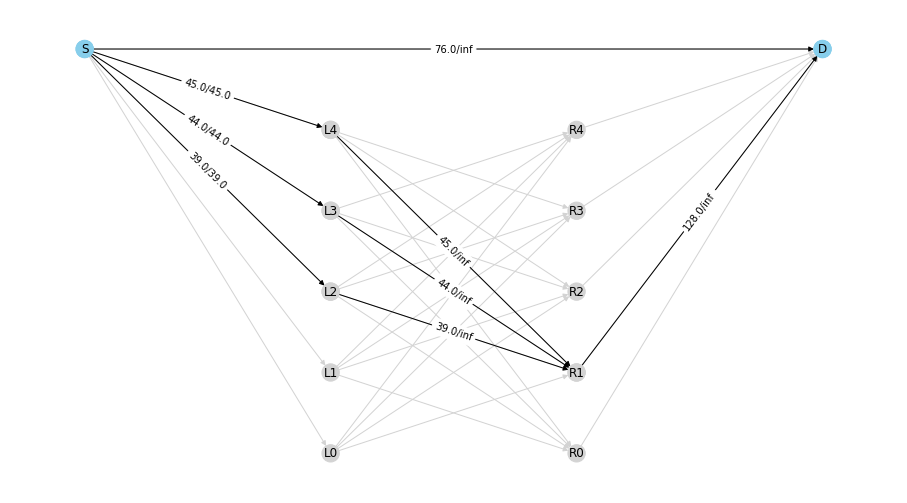

In [142]:
problem.subproblem_1.visualize_flow();